In [2]:
import importlib, os

import torch 
from library.functions import model_parameters
import library.functions.misc_helper_functions as misc_helpers
import library.data.data_helper_functions as data_helpers
from library.base_models import tree_models, linear_models

from IPython.display import display

In [125]:
importlib.reload(data_helpers)
class ARGS(object):
    def __init__(self):
        self.batch_size = 1
        self.data_type = torch.float
        self.validation_fraction = 0.3
        self.seed = 10
        self.device = torch.device('cuda')
        self.data_folder = '/work1/s174505/Thesis/Data/'
        self.training_data_file = 'Interpolated_data_training_v2.pt'
        self.debugging = False
        self.use_cv = True
        self.cv_index = 19
        self.cv_folds = 21
           
        self.testing_data_file = ""
            
        self.in_features = 38
        self.out_features = 12
        self.batch_size = 1
            
        self.save_model_freq = 1200
        self.run_id = "12345"
        self.run_index = "0"
        self.model_savepoint_folder = "/work1/s174505/Thesis/Models/"
            
        self.max_epochs = 10
            
        self.debugging = False
            
        self.optimizer = "Adam"
        self.lr = 1e-3
        self.use_lr_schedule = False
        self.weight_decay = 0.001
        self.momentum = 0.1
            
        self.model = "base_cnn"
        self.parameter_settings = 0
        self.use_dropout = False
args = ARGS()

hyperparameters, model = model_parameters.parameters(args)

torch.random.manual_seed(args.seed)
net = model(hyperparameters).to(device=args.device, dtype=args.data_type)

train_dataset, val_dataset = data_helpers.load_data_training(args, net)

params = {'batch_size': args.batch_size,
          'shuffle': False,
          'drop_last': False}
train_loader = torch.utils.data.DataLoader(train_dataset, **params)
val_loader = torch.utils.data.DataLoader(val_dataset, **params)

314
torch.Size([12, 70000])
torch.Size([12, 69686])
314
torch.Size([12, 70000])
torch.Size([12, 69686])
314
torch.Size([12, 50000])
torch.Size([12, 49686])
314
torch.Size([12, 10000])
torch.Size([12, 9686])
314
torch.Size([12, 10000])
torch.Size([12, 9686])


In [122]:
for (_X,_y) in train_loader:
    print(_X.shape, _y.shape)

torch.Size([1, 38, 210000]) torch.Size([1, 12, 69686])
torch.Size([1, 38, 210000]) torch.Size([1, 12, 69686])
torch.Size([1, 38, 150000]) torch.Size([1, 12, 49686])
torch.Size([1, 38, 30000]) torch.Size([1, 12, 9686])


In [111]:
(X,y) = torch.load("/work1/s174505/Thesis/Data/Interpolated_data_training_v2.pt")

In [66]:
cv_folds = 21
cv_index = 19
cv_folds_per_area = cv_folds//3
cv_area_index = cv_index%cv_folds_per_area

In [68]:
print(cv_index//cv_folds_per_area)
print(cv_index%cv_folds_per_area)

2
5


In [115]:
print(X.shape, y.shape)
val_area = cv_index//cv_folds_per_area
X_splitted = X#.split(1)
y_splitted = y#.split(1)
val_x_area = X_splitted[val_area].split(X.shape[-1]//cv_folds_per_area,dim=-1)
val_y_area = y_splitted[val_area].split(y.shape[-1]//cv_folds_per_area,dim=-1)

X_before_validation = [val_x_area[i] for i in range(cv_area_index)]
X_after_validation = [val_x_area[i] for i in range(cv_area_index+1,len(val_x_area))]
y_before_validation = [val_y_area[i] for i in range(cv_area_index)]
y_after_validation = [val_y_area[i] for i in range(cv_area_index+1,len(val_y_area))]

train_samples = [(X_splitted[i],y_splitted[i]) for i in range(3) if i != val_area]
val_sample = (val_x_area[cv_area_index], val_y_area[cv_area_index])
if len(X_before_validation) > 0:
    train_samples.append( (torch.hstack(X_before_validation), torch.hstack(y_before_validation)) )
if len(X_after_validation) > 0:
    train_samples.append( (torch.hstack(X_after_validation), torch.hstack(y_after_validation)) )

torch.Size([3, 38, 210000]) torch.Size([3, 12, 70000])


In [116]:
for (sample_X, sample_y) in train_samples:
    print(sample_X.shape, sample_y.shape)

torch.Size([38, 210000]) torch.Size([12, 70000])
torch.Size([38, 210000]) torch.Size([12, 70000])
torch.Size([38, 150000]) torch.Size([12, 50000])
torch.Size([38, 30000]) torch.Size([12, 10000])


In [77]:
dataset = torch.utils.data.TensorDataset(*[X for X,_ in train_samples])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
os.listdir("/work1/s174505/Thesis/runs/")

['base_cnn_Interpolated_data_v2_02-08-2022_22:22_13882878_2_cv-7-21_unsigned',
 'base_cnn_Interpolated_data_v2_03-08-2022_01:13_13882878_12_cv-20-21_signed',
 'base_cnn_Interpolated_data_v2_02-08-2022_23:42_13882878_9_cv-7-21_unsigned',
 'base_cnn_Interpolated_data_v2_03-08-2022_00:58_13882878_13_cv-13-21_signed',
 'base_cnn_Interpolated_data_v2_02-08-2022_22:48_13882878_1_cv-14-21_unsigned',
 'base_cnn_Interpolated_data_v2_03-08-2022_00:35_13882878_14_cv-0-21_signed',
 'base_cnn_Interpolated_data_v2_03-08-2022_00:22_13882878_8_cv-20-21_signed',
 'base_cnn_Interpolated_data_v2_03-08-2022_01:21_13882878_16_cv-0-21_signed',
 'base_cnn_Interpolated_data_v2_02-08-2022_23:42_13882878_9_cv-7-21_signed',
 'base_cnn_Interpolated_data_v2_02-08-2022_22:36_13882878_2_cv-13-21_unsigned',
 'base_cnn_Interpolated_data_v2_03-08-2022_00:33_13882878_12_cv-0-21_unsigned',
 'base_cnn_Interpolated_data_v2_03-08-2022_02:53_13882878_22_cv-20-21_signed',
 'base_cnn_Interpolated_data_v2_03-08-2022_01:26_13882

In [5]:
run_id = "13882878"

In [18]:
folder ="/work1/s174505/Thesis/runs/"
summary_iterators = {run_file[47:] : EventAccumulator(os.path.join(folder, run_file)).Reload() for run_file in os.listdir(folder)
    if run_id in run_file and run_file.endswith("unsigned")}

In [26]:
meta_info = {s : {"run_id" : s.split("_")[0], "run_index" : int(s.split("_")[1]), "cv_index" : int(s.split("-")[1])} for s in summary_iterators.keys()}
df_meta_info = pd.DataFrame.from_dict(meta_info, orient="index")

group1 = df_meta_info[df_meta_info["run_index"] <= 11]
group2 = df_meta_info[df_meta_info["run_index"] > 11]

In [71]:
results1_all = {grp[0] : pd.DataFrame({tag : pd.DataFrame({
        s : [e.value for e in summary_iterators[s].Scalars(tag)] for s in grp[1].index
    }).mean(1) for tag in summary_iterators[grp[1].index[0]].Tags()["scalars"]}) for grp in group1.groupby("run_index")}

results1_train = pd.DataFrame({lr : results1_all[i]["train/mean/aggregate"] for i,lr in enumerate(np.logspace(-5,-2,11)[:11],1)})
results1_val = pd.DataFrame({lr : results1_all[i]["val/mean/aggregate"] for i,lr in enumerate(np.logspace(-5,-2,11)[:11],1)})

results2_all = {grp[0] : pd.DataFrame({tag : pd.DataFrame({
        s : [e.value for e in summary_iterators[s].Scalars(tag)] for s in grp[1].index
    }).mean(1) for tag in summary_iterators[grp[1].index[0]].Tags()["scalars"]}) for grp in group2.groupby("run_index")}

results2_train = pd.DataFrame({lr : results2_all[i]["train/mean/aggregate"] for i,lr in enumerate(np.logspace(-5,-2,11)[:11],12)})
results2_val = pd.DataFrame({lr : results2_all[i]["val/mean/aggregate"] for i,lr in enumerate(np.logspace(-5,-2,11)[:11],12)})

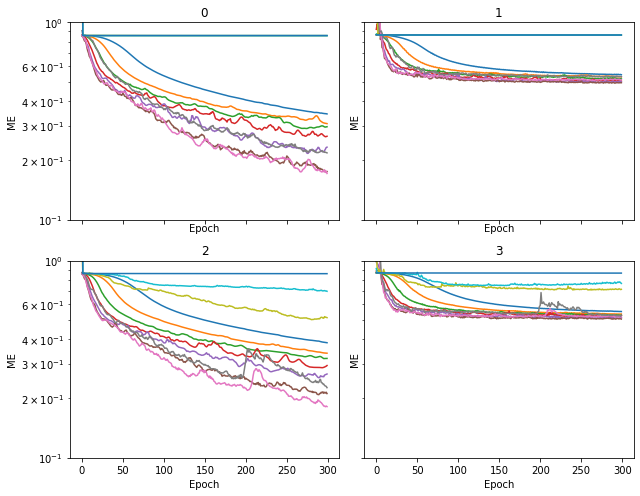

In [80]:
fig, axes = plt.subplots(2,2,figsize=(9,7), sharex=True, sharey=True)
x = np.arange(1,301)

ax: plt.Axes = axes[0,0]
for i, (ax, data) in enumerate(zip(axes.flatten(), [results1_train, results1_val, results2_train, results2_val])):
    ax.plot(data)
    ax.set_yscale("log")
    ax.set_title(i)
    ax.set_ylim([1e-1, 1e-0])
    ax.set_xlabel("Epoch")
    ax.set_ylabel("ME")

fig.tight_layout()
plt.show()


In [82]:
display(results1_val.tail(5))
display(results2_val.tail(5))

,0.000010,0.000020,0.000040,0.000079,0.000158,0.000316,0.000631,0.001259,0.002512,0.005012,0.010000
295,0.546351,0.529727,0.518064,0.502313,0.499848,0.494564,0.514054,0.532907,0.862745,0.862745,0.863185
296,0.543358,0.530969,0.519261,0.505434,0.503588,0.493730,0.515599,0.530728,0.862745,0.862745,0.863184
297,0.543981,0.529473,0.517569,0.503899,0.500643,0.494597,0.514707,0.532243,0.862745,0.862745,0.863182
298,0.544558,0.530116,0.518759,0.504271,0.503152,0.494732,0.511566,0.532143,0.862745,0.862745,0.863181
299,0.542885,0.529468,0.517299,0.505154,0.498637,0.494597,0.510903,0.530550,0.862745,0.862746,0.863179


,0.000010,0.000020,0.000040,0.000079,0.000158,0.000316,0.000631,0.001259,0.002512,0.005012,0.010000
295,0.551793,0.535585,0.529876,0.524969,0.509959,0.508129,0.517372,0.523795,0.713222,0.778962,0.863202
296,0.552019,0.535161,0.527470,0.520096,0.510787,0.505286,0.519815,0.526389,0.718455,0.773663,0.863199
297,0.551345,0.535449,0.528282,0.524996,0.511357,0.507553,0.520028,0.525215,0.717320,0.779267,0.863196
298,0.551740,0.535043,0.527455,0.521892,0.515123,0.506621,0.517663,0.521966,0.712336,0.772912,0.863193
299,0.551288,0.535453,0.528150,0.526944,0.512575,0.504855,0.518332,0.527303,0.714100,0.765439,0.863189


In [3]:
ode_run = torch.load("/work1/s174505/Thesis/Models/base_cnn_17-08-2022_15:30_13912361_0_best_seen.pty")

In [4]:
ode_run.keys()

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'parameters', 'args', 'val_errors'])

In [12]:
print(ode_run["epoch"])
print(ode_run["val_errors"].abs().mean(2))
print(ode_run["parameters"])

812
tensor([[0.3011, 0.2418, 0.2726, 0.4018, 0.3020, 0.2469, 0.2586, 0.3031, 0.2995,
         0.2481, 0.2573, 0.3081]], device='cuda:0')
{'data_type': 'torch.float32', 'device': 'cuda', 'data_folder': '/work1/s174505/Thesis/Data/', 'training_data_file': 'ODE_simulation_data_training.pt', 'testing_data_file': 'Interpolated_data_testing.pt', 'validation_fraction': 0.3, 'in_features': 38, 'out_features': 12, 'batch_size': 1, 'seed': 10, 'save_model_freq': 1200, 'run_id': '13912361_0', 'run_index': 0, 'model_savepoint_folder': '/work1/s174505/Thesis/Models/', 'max_epochs': 1200, 'debugging': False, 'use_cv': False, 'cv_folds': 21, 'cv_index': 0, 'optimizer': 'Adam', 'lr': 0.000316, 'use_lr_schedule': True, 'weight_decay': 3.1623e-07, 'momentum': 0.9, 'model': 'base_cnn', 'strides': [3, 1, 1], 'kernel_lenghts': [1801, 7, 3], 'channels': [64, 32], 'paddings': [0, 0, 0], 'activation_function': 'elu', 'use_batch_normalization': False, 'use_dropout': True, 'dropout': [0.5, 0.2]}
